# Stochastic Calculus

## Deterministic dynamical systems

### Numerical solution of dynamical systems: inflation targetting

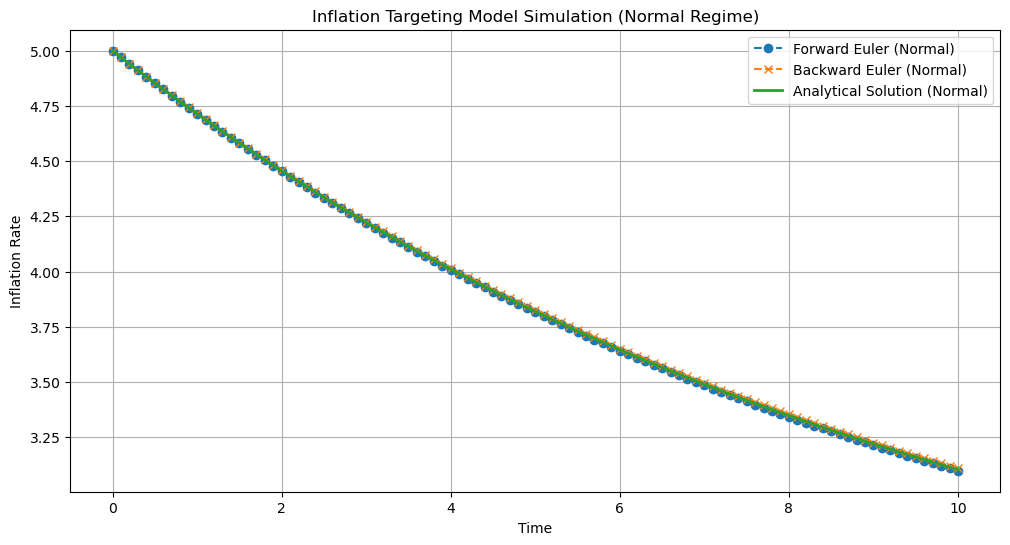

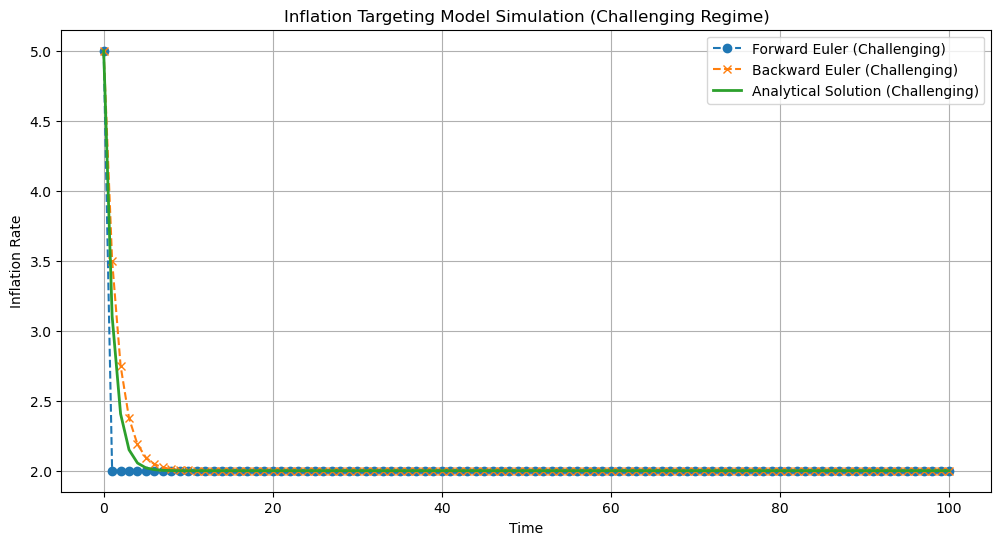

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_inflation(theta, pi_hat, pi_t0, Delta, N):
    # Time grid
    time = np.linspace(0, N * Delta, N + 1)

    # Arrays to store the results
    pi_forward = np.zeros(N + 1)
    pi_backward = np.zeros(N + 1)
    pi_analytical = np.zeros(N + 1)

    # Initial condition
    pi_forward[0] = pi_t0
    pi_backward[0] = pi_t0

    # Analytical Solution
    pi_analytical = pi_hat + (pi_t0 - pi_hat) * np.exp(-theta * time)

    # Forward Euler Scheme
    for i in range(N):
        pi_forward[i + 1] = pi_forward[i] + Delta * theta * (pi_hat - pi_forward[i])

    # Backward Euler Scheme
    for i in range(N):
        pi_backward[i + 1] = (pi_backward[i] + Delta * theta * pi_hat) / (1 + Delta * theta)

    return time, pi_forward, pi_backward, pi_analytical

# Parameters for normal regime
theta_normal = 0.1
Delta_normal = 0.1
pi_hat = 2.0
pi_t0 = 5.0
N = 100

# Parameters for challenging regime
theta_challenging = 1.0
Delta_challenging = 1.0

# Simulate for normal regime
time_normal, pi_forward_normal, pi_backward_normal, pi_analytical_normal = simulate_inflation(
    theta_normal, pi_hat, pi_t0, Delta_normal, N)

# Simulate for challenging regime
time_challenging, pi_forward_challenging, pi_backward_challenging, pi_analytical_challenging = simulate_inflation(
    theta_challenging, pi_hat, pi_t0, Delta_challenging, N)

# Plot the results for normal regime
plt.figure(figsize=(12, 6))
plt.plot(time_normal, pi_forward_normal, label='Forward Euler (Normal)', marker='o', linestyle='--')
plt.plot(time_normal, pi_backward_normal, label='Backward Euler (Normal)', marker='x', linestyle='--')
plt.plot(time_normal, pi_analytical_normal, label='Analytical Solution (Normal)', linestyle='-', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Inflation Rate')
plt.title('Inflation Targeting Model Simulation (Normal Regime)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results for challenging regime
plt.figure(figsize=(12, 6))
plt.plot(time_challenging, pi_forward_challenging, label='Forward Euler (Challenging)', marker='o', linestyle='--')
plt.plot(time_challenging, pi_backward_challenging, label='Backward Euler (Challenging)', marker='x', linestyle='--')
plt.plot(time_challenging, pi_analytical_challenging, label='Analytical Solution (Challenging)', linestyle='-', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Inflation Rate')
plt.title('Inflation Targeting Model Simulation (Challenging Regime)')
plt.legend()
plt.grid(True)
plt.show()


## The Wiener Process
### Simulation of the Wiener process (univariate)

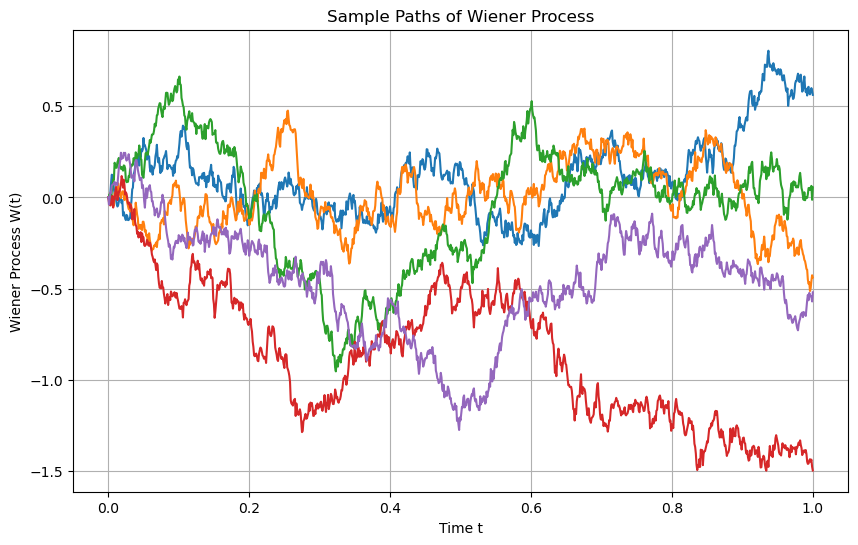

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Set the parameters for the Wiener process
T = 1.0  # total time
n = 1000  # number of steps
dt = T / n  # time increment
t = np.linspace(0, T, n+1)  # time points

# Number of paths to simulate
num_paths = 5

# Set up the plot
plt.figure(figsize=(10, 6))

# Simulate multiple paths
for _ in range(num_paths):
    W = np.zeros(n+1)  # Initialize the Wiener process for each path
    for i in range(n):
        W[i+1] = W[i] + np.sqrt(dt) * np.random.randn()
    plt.plot(t, W, label=f'Path {_+1}')

# Customize the plot
plt.title('Sample Paths of Wiener Process')
plt.xlabel('Time t')
plt.ylabel('Wiener Process W(t)')
plt.grid(True)

# Show the plot
plt.show()


#### Simulation using Gaussian processes

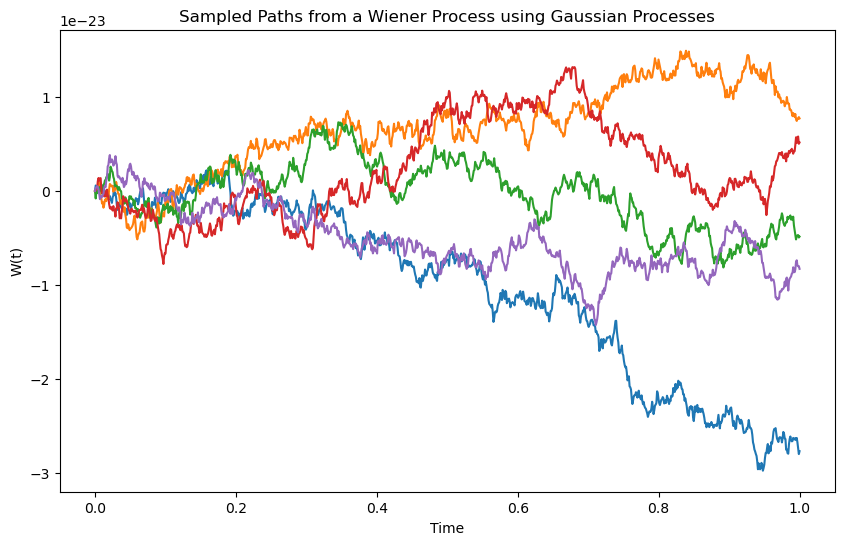

In [46]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

# Time points at which to sample the Wiener process
t = np.linspace(0, 1, 1000).reshape(-1, 1)

# Define the Brownian motion kernel
brownian_kernel = GPy.kern.Brownian(input_dim=1, variance=1.0)

# Create a GP model with zero mean function
mean_function = GPy.mappings.Constant(input_dim=1, output_dim=1, value=0)
model = GPy.models.GPRegression(t, np.zeros_like(t), kernel=brownian_kernel, mean_function=mean_function)

# Ensure correct model optimization
model.optimize()

# Sample paths from the GP model
num_samples = 5
samples = model.posterior_samples_f(t, size=num_samples)

# Plot the sampled paths
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot(t, samples[:, :, i], label=f'Sample {i+1}')
plt.title('Sampled Paths from a Wiener Process using Gaussian Processes')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.show()
